In [20]:
from colory.color import Color
from datetime import datetime
import duckdb as ddb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = ddb.read_parquet("../week3/rplace.parquet")

pixel_data = ddb.sql(f"""
    SELECT x, y, COUNT(*) as count
    FROM data
    GROUP BY x, y
    ORDER BY count DESC
""").fetchdf()

print(pixel_data[:3])



     x    y  count
0    0    0  98807
1  359  564  69198
2  349  564  55230


As show by the above query on the r/place dataset, the top 3 most placed pixels and their counts are as follows:
1. (0, 0)     98,807 times
2. (359, 564) 69,198 times
3. (349, 564) 55,230 times

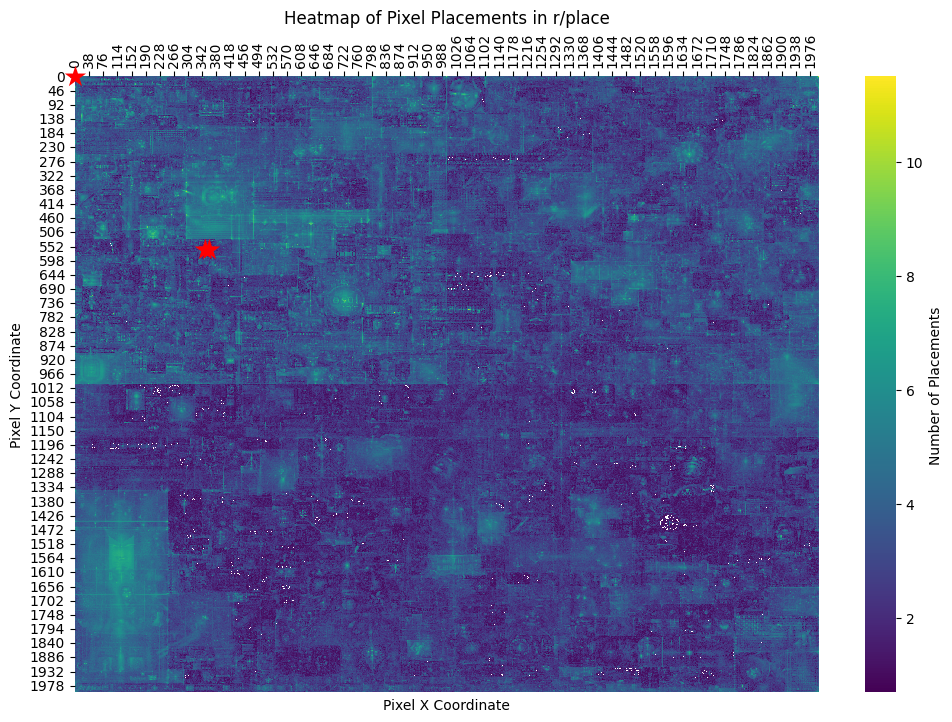

In [43]:
# Create a pivot table for the heatmap with log transformation
pixel_data['log_count'] = np.log1p(pixel_data['count'])
heatmap_data = pixel_data.pivot(index='y', columns='x', values='log_count')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Number of Placements'})

# Find the top 3 pixels
top_pixels = pixel_data.nlargest(3, 'count')

# Annotate the top 3 pixels on the heatmap
for _, row in top_pixels.iterrows():
    plt.text(row['x'], row['y'], '★', color='red', ha='center', va='center', fontsize=20)

plt.title('Heatmap of Pixel Placements in r/place')
plt.xlabel('Pixel X Coordinate')
plt.ylabel('Pixel Y Coordinate')

# Move x-axis labels to the top
plt.gca().xaxis.set_ticks_position('top')  # Move x-axis ticks to the top
plt.xticks(rotation=90)

plt.show()